# Figure 1
modified from plots.ipynb

In [1]:
import os, sys
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from glob import glob

from scipy.interpolate import interp1d

In [2]:
magma = {'black': '#000004', 
         'purple': '#3b0f70', 
         'pink-purple': '#8c2981', 
         'pink-red': '#de4968', 
         'orange': '#fe9f6d', 
         'pale yellow': '#fcfdbf'}

magma_8 = {'dark purple': '#221150',
           'purple': '#5f187f',
           'pink-purple': '#982d80',
           'pink-red': '#d3436e',
           'orange': '#f8765c',
           'light orange': '#febb81',
           'pale yellow': '#fcfdbf'}

axis_label_fontsize = 18
axis_ticks_fontsize = 14
legend_title_fontsize = 16
legend_fontsize = 14
legend_fontsize_small = 11
extra_thick_linewidth = 4
thick_linewidth = 3
med_linewidth = 2
marker_size = 6
fig_size = (8.0, 6.0)
# line_style = (0,(2,2))#(0.3,(2,2))#(1,(3,2))

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)
matplotlib.rcParams["figure.dpi"] = 300
plt.rcParams.update({'font.size': 14})

In [3]:
# constants
g_A = 1.27 # [unitless] axial form factor
################
R_odot = 8.5 # [kpc] Sun's distance from centre of MW, from Clemens 1985
rho_s = 0.51 # [GeV/cm^3] DM radial scale for MW NFW profile; https://arxiv.org/abs/1906.08419
r_s = 8.1 # [kpc] DM radial scale for MW NFW profile; https://arxiv.org/abs/1906.08419; also used as distance scale for creating unitless quantities
################
energyScale = 10 # [MeV] energy scale for creating unitless quantities

# importing C12 and O16 data: excitation energies [MeV] and GT strengths [unitless]
C12_data = 'C12_dEs_GTs.txt'
O16_data = 'O16_dEs_GTs.txt'
C12df = pd.read_csv(C12_data, sep='\t', names=['dE [MeV]', 'GT'], skiprows=1, float_precision='round_trip')
O16df = pd.read_csv(O16_data, sep='\t', names=['dE [MeV]', 'GT'], skiprows=1, float_precision='round_trip')

# nuclear info dictionary
nuc_dict = {'C12': {'mass [MeV]': 11274.78, 'mass [unitless]': 11274.78/energyScale, 'spin': 0.0, 'dEs [MeV]': C12df['dE [MeV]'], 'GTs': C12df['GT']}, \
            'O16': {'mass [MeV]': 15033.04, 'mass [unitless]': 15033.04/energyScale, 'spin': 0.0, 'dEs [MeV]': O16df['dE [MeV]'], 'GTs': O16df['GT']}}
# 'He4': {'mass_MeV': 3758.26, 'mass [unitless]': 3758.26/energyScale, 'spin': 0.0}
# 'N14': {'mass_MeV': 13153.91, 'mass [unitless]': 13153.91/energyScale, 'spin': 0.0}


In [4]:
# https://waldyrious.net/viridis-palette-generator/
# magma 6: black '#000004', purple '#3b0f70', pink-purple '#8c2981', pink-red '#de4968', orange '#fe9f6d', pale yellow '#fcfdbf'
# viridis 6: purple '#440154', dark blue '#414487', teal '#2a788e', blue-green '#22a884', green '#7ad151', yellow '#fde725'

colours = {'magma' : {'C12': '#8c2981', 'O16': '#fe9f6d'},
           'viridis' : {'C12': '#2a788e', 'O16': '#7ad151'}}

# https://colorbrewer2.org/#type=diverging&scheme=RdYlBu&n=4
# '#ca0020', '#f4a582', '#92c5de', '#0571b0'
# '#d7191c', '#fdae61', '#8db5c2', '#1f5782'
# colour_limits_dict = {'C12': {'lower': '#e66101', 'upper': '#fdb863'}, 'O16': {'lower': '#5e3c99', 'upper': '#b2abd2'}}
# colours = {'C12': '#b2abd2', 'O16': '#5e3c99'} # purples
# colours = {'C12': '#21918c', 'O16': '#7ad151'} # greens - VIRIDIS https://waldyrious.net/viridis-palette-generator/
# colours = {'C12': '#31688e', 'O16': '#7ad151'} # VIRIDIS - this is the old colour palette used
# colours = {'C12':'#982d80', 'O16':'#fe9f6d'}#, 'p1n0_H_He':'#982d80', 'p1n0_H':'#51127c'} # magma   

# magma colours = {'p0n1_He':'#e75263', 'p1n1_H_He':'#fe9f6d', 'p1n0_H_He':'#982d80', 'p1n0_H':'#51127c'} # magma
# colours = {'C12': '#e66101', 'O16': '#5e3c99'}
# {'C12': '#8db5c2', 'O16': '#1f5782'} # blues

# colours = {'1': '#d7191c', '2': '#fdae61', '3': '#8db5c2', '4': '#1f5782'}
# #e66101 #fdb863 #b2abd2 #5e3c99

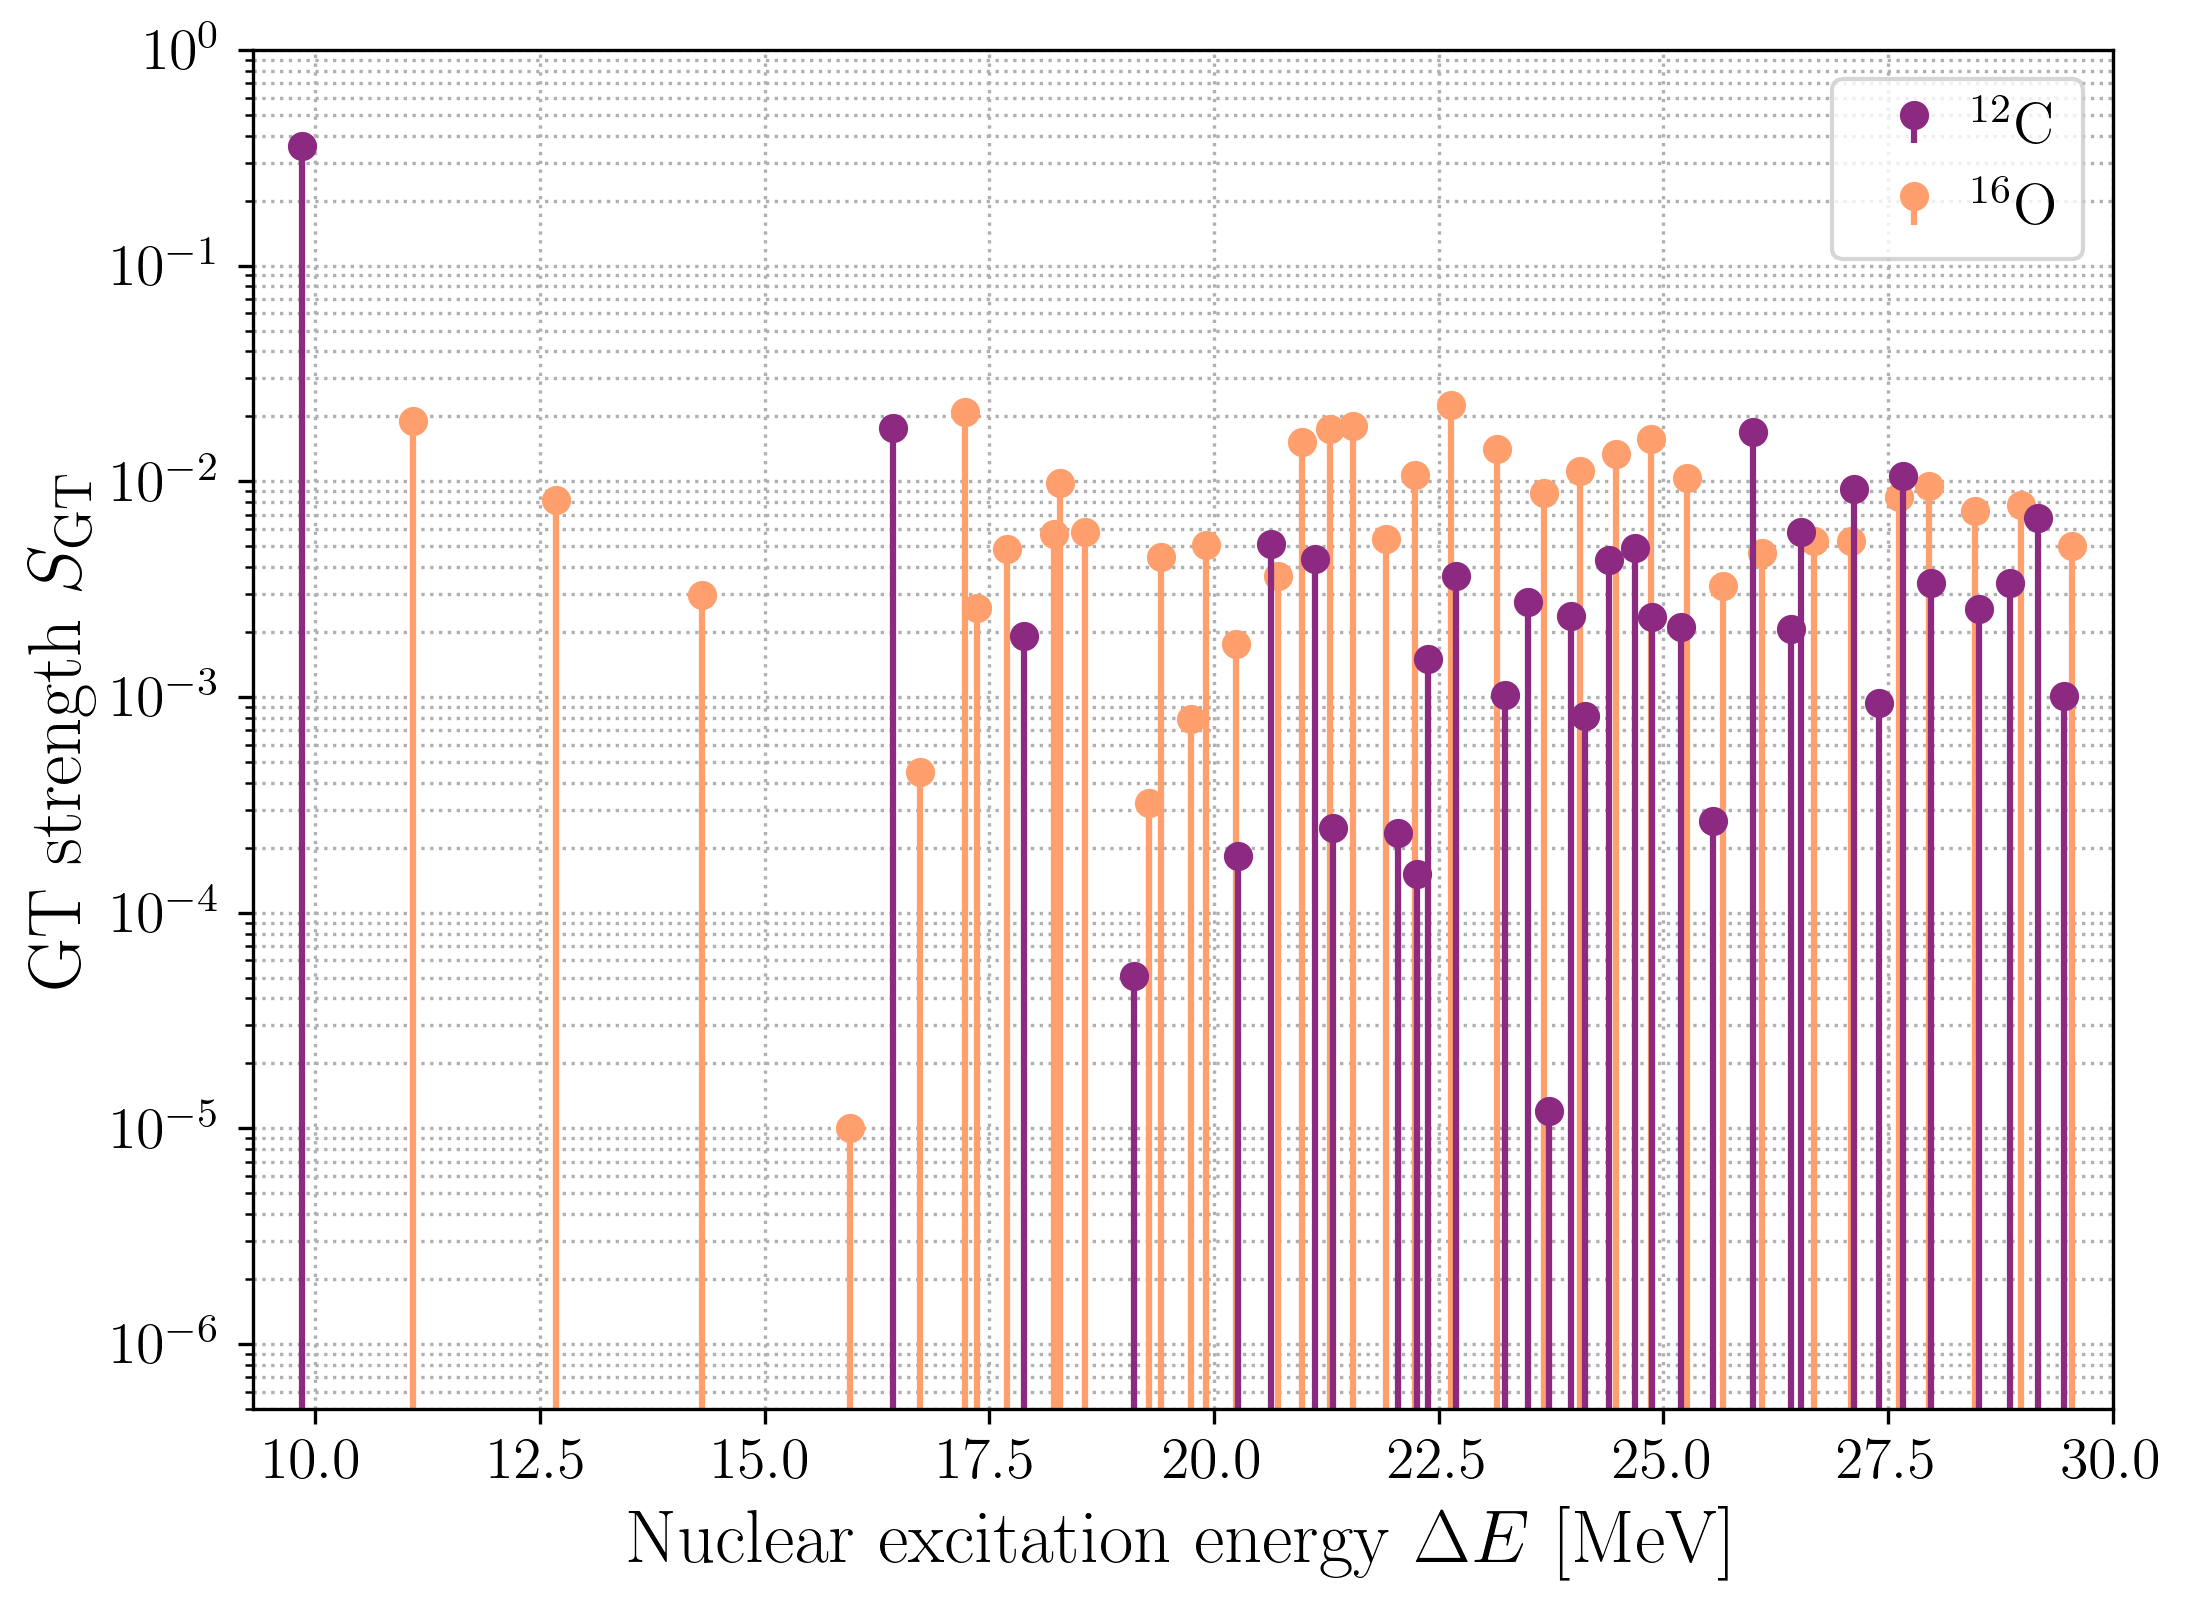

In [6]:
def plot_GT_strengths(colour_palette, save): # this one is the one being used
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    plt.rc('text', usetex=True)
    matplotlib.rcParams["figure.dpi"] = 300
    plt.rcParams.update({'font.size': 14})
    
    fig, ax = plt.subplots(figsize = fig_size)
    plt.grid(which = 'both', linestyle = 'dotted')
    plt.yscale('log'); plt.ylim(5e-7,1)
    plt.xlim(9.3,30)
    # plt.xticks(fontsize=axis_label_fontsize); plt.yticks(fontsize=16)
    plt.xlabel(r'Nuclear excitation energy $\Delta E ~ \mathrm{[MeV]}$', fontsize = axis_label_fontsize)
    plt.ylabel(r'GT strength $S_\mathrm{GT}$', fontsize = axis_label_fontsize)

    # colours[colour_palette]['O16']
    ax.stem(nuc_dict['O16']['dEs [MeV]'][0:38], nuc_dict['O16']['GTs'][0:38], magma['orange'], markerfmt = 'o', basefmt=" ", \
            label=r'$^{16}$O')
    ax.stem(nuc_dict['C12']['dEs [MeV]'][0:33], nuc_dict['C12']['GTs'][0:33], magma['pink-purple'], markerfmt = 'o', basefmt=" ", \
            label=r'$^{12}$C')

    handles, labels = plt.gca().get_legend_handles_labels()
    legendOrder = [1,0] # reverse order of legend items
    plt.legend([handles[idx] for idx in legendOrder], [labels[idx] for idx in legendOrder], fontsize=legend_fontsize, handletextpad=0)
    
    if save:
        # plt.savefig('/Users/arm5765/Desktop/DISSERTATION/figures/GT_strengths.pdf'.format(colour_palette), bbox_inches="tight")        
        plt.savefig('figures/GT_strengths.pdf'.format(colour_palette), bbox_inches="tight")
    plt.show()

plot_GT_strengths(colour_palette = 'magma', save=True)
